In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_auc_score,roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [3]:
path='/content/Drive/MyDrive/Data_Analysis/Datasets/telecom_churn.csv'
data=pd.read_csv(path)

In [4]:
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
data.tail()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [6]:
data.shape

(3333, 11)

In [7]:
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [9]:
data=data.drop_duplicates()

dataset is completely cleaned

In [10]:
for i in data.columns:
  print(f"{i} contains {data[i].nunique()} values")

Churn contains 2 values
AccountWeeks contains 212 values
ContractRenewal contains 2 values
DataPlan contains 2 values
DataUsage contains 174 values
CustServCalls contains 10 values
DayMins contains 1667 values
DayCalls contains 119 values
MonthlyCharge contains 627 values
OverageFee contains 1024 values
RoamMins contains 162 values


<Axes: >

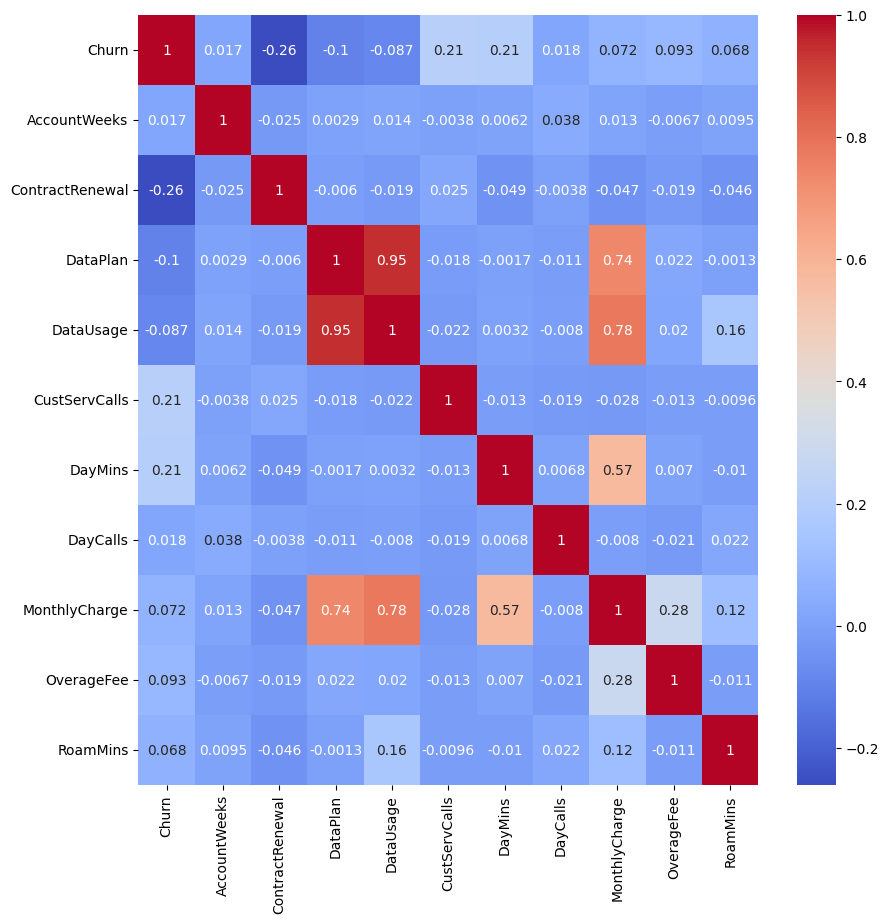

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [12]:
data['Churn'].value_counts()

,count
Churn,
0,2850
1,483


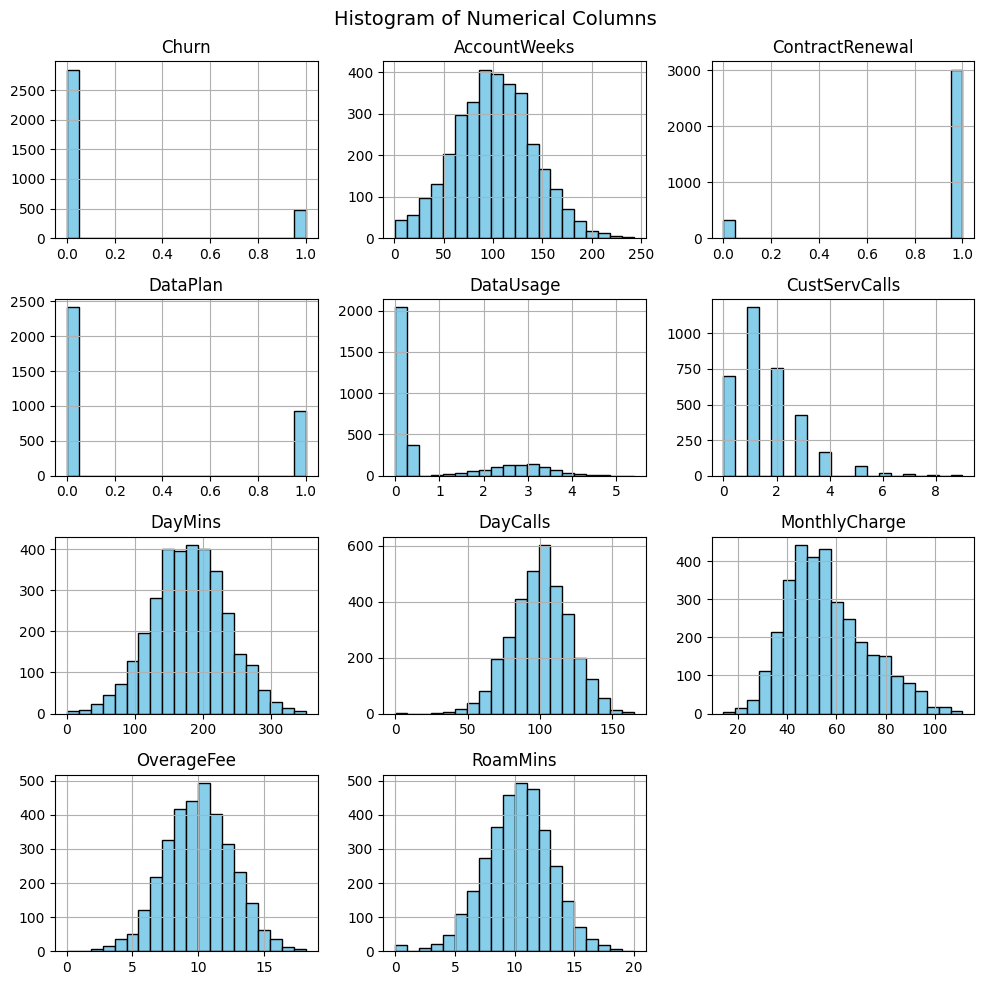

In [13]:
data.hist(figsize=(10,10), bins=20,color='skyblue',edgecolor='black')
plt.suptitle('Histogram of Numerical Columns', fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
df_cat=data.copy()
for i in ['Churn','DataPlan']:
  df_cat[i].replace({1:'Yes',0:'No'})

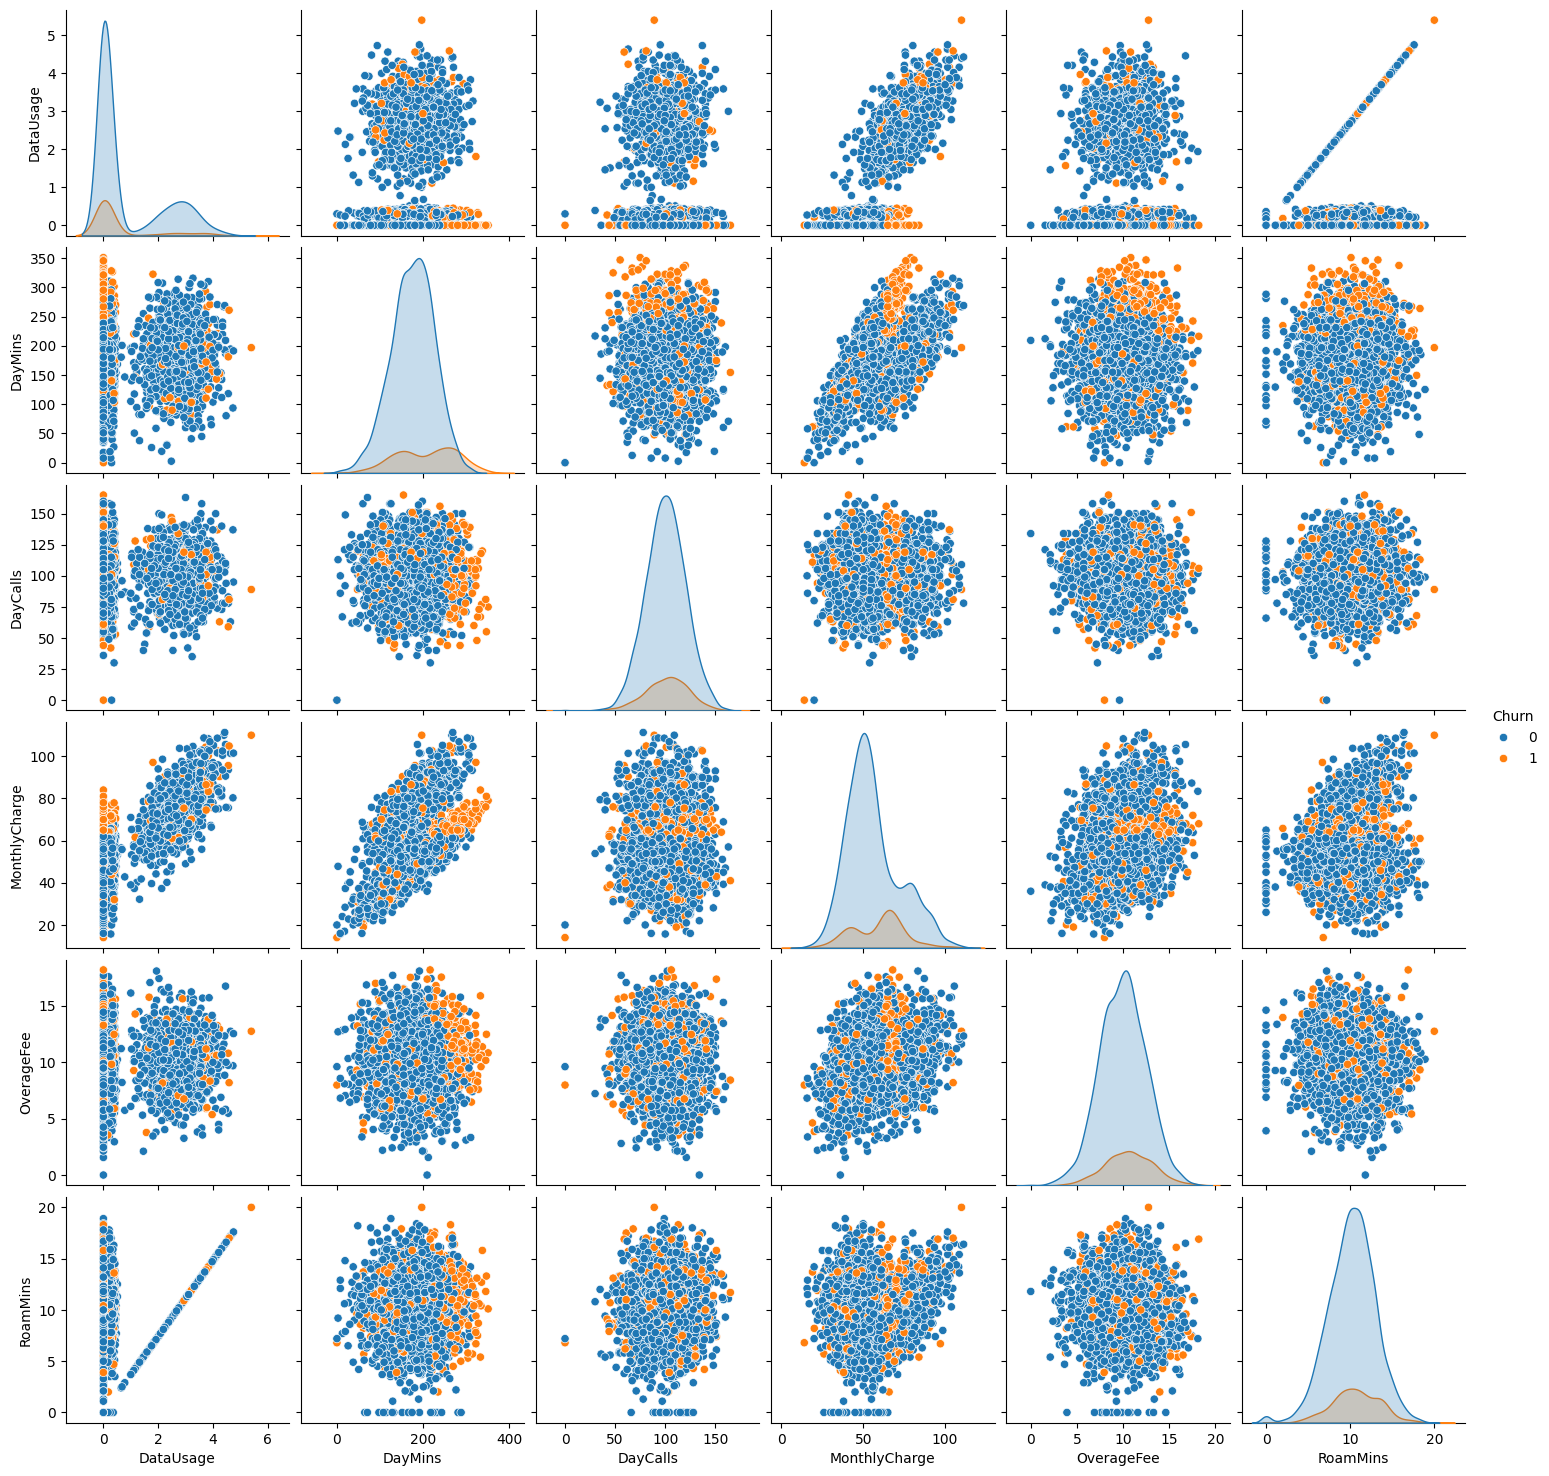

In [15]:
required_vars=['DataUsage','DayMins','DayCalls','MonthlyCharge','OverageFee','RoamMins']
sns.pairplot(data,vars=required_vars,hue='Churn')

In [16]:
col=['DayMins','DayCalls','AccountWeeks','MonthlyCharge','OverageFee','RoamMins']
data[col].skew().to_frame('Skewness')

,Skewness
DayMins,-0.029077
DayCalls,-0.111787
AccountWeeks,0.096606
MonthlyCharge,0.594498
OverageFee,-0.023845
RoamMins,-0.245136


In [17]:
data['MonthlyCharge']=np.log(data['MonthlyCharge'])

In [18]:
data['Churn'].value_counts()

,count
Churn,
0,2850
1,483


In [19]:
X_train,x_test,y_train,y_test=train_test_split(data.drop('Churn',axis=1),data['Churn'],test_size=0.2,random_state=42,stratify=data['Churn'],shuffle=True)

#Balancing the classes

In [20]:
X_train_resample,y_train_resample=SMOTE(random_state=42).fit_resample(X_train,y_train)

#Normalize the data

In [21]:
X_train_resample=StandardScaler().fit_transform(X_train_resample)
x_test=StandardScaler().fit_transform(x_test)

#Logistic Model

In [22]:
lr=LogisticRegression()
lr.fit(X_train_resample,y_train_resample)

LogisticRegression()

In [23]:
y_pred=lr.predict(x_test)

In [24]:
accuracy_training_data=lr.predict(X_train_resample)
accuracy_score(y_train_resample,accuracy_training_data)

0.8339912280701754

In [25]:
accuracy_score(y_test,y_pred)

0.6521739130434783

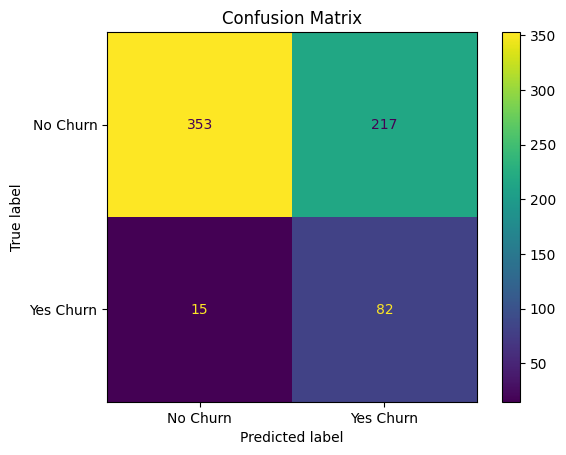

In [26]:
cm=confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay(cm,display_labels=['No Churn','Yes Churn']).plot()
plt.title('Confusion Matrix')
plt.show()

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.62      0.75       570
           1       0.27      0.85      0.41        97

    accuracy                           0.65       667
   macro avg       0.62      0.73      0.58       667
weighted avg       0.86      0.65      0.70       667



In [32]:
auc= roc_auc_score(y_test,y_pred)
fpr, tpr, threshold=roc_curve(y_test,y_pred)

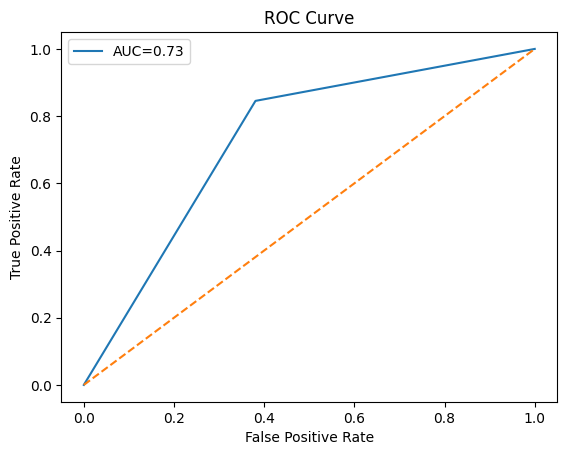

In [35]:
plt.plot(fpr,tpr,label=f'AUC={auc:.2f}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Decision Tree

In [42]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_resample,y_train_resample)

DecisionTreeClassifier(max_depth=5)

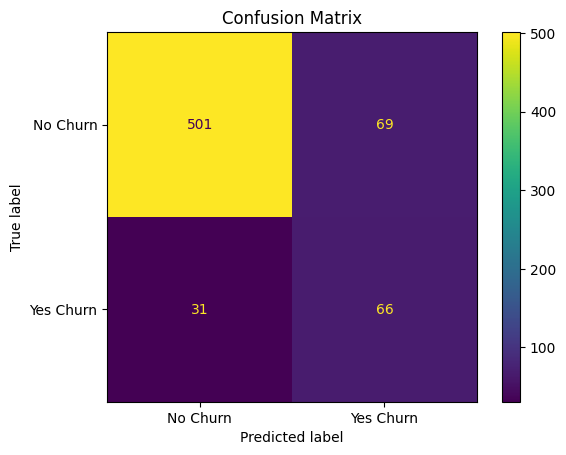

In [55]:
dt_cm=confusion_matrix(y_test,dt.predict(x_test))

ConfusionMatrixDisplay(dt_cm,display_labels=['No Churn','Yes Churn']).plot()
plt.title('Confusion Matrix')
plt.show()

In [44]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       570
           1       0.49      0.68      0.57        97

    accuracy                           0.85       667
   macro avg       0.72      0.78      0.74       667
weighted avg       0.88      0.85      0.86       667



In [56]:
auc1=roc_auc_score(y_test,dt.predict(x_test))
fpr1,tpr1,threshold1=roc_curve(y_test,dt.predict(x_test))

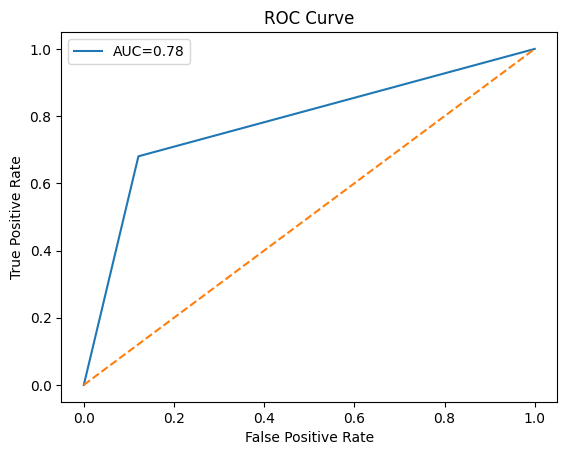

In [57]:
plt.plot(fpr1,tpr1,label=f'AUC={auc1:.2f}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Random Forest Model

In [46]:
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train_resample, y_train_resample)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

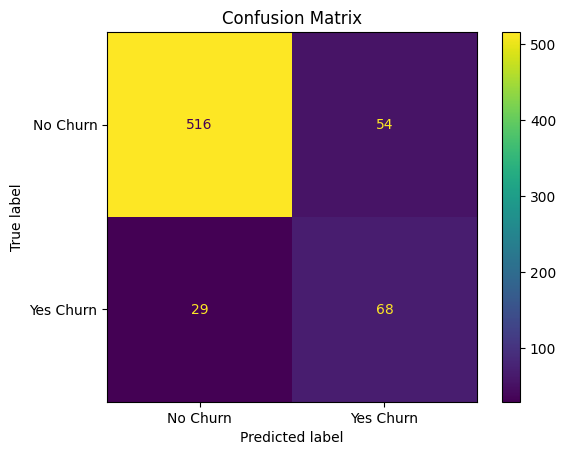

In [54]:
rf_cm=confusion_matrix(y_test,rf.predict(x_test))

ConfusionMatrixDisplay(rf_cm,display_labels=['No Churn','Yes Churn']).plot()
plt.title('Confusion Matrix')
plt.show()

In [51]:
print(classification_report(y_test,rf.predict(x_test)))


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       570
           1       0.56      0.70      0.62        97

    accuracy                           0.88       667
   macro avg       0.75      0.80      0.77       667
weighted avg       0.89      0.88      0.88       667



In [52]:
auc2=roc_auc_score(y_test,rf.predict(x_test))
fpr2,tpr2,threshold2=roc_curve(y_test,rf.predict(x_test))

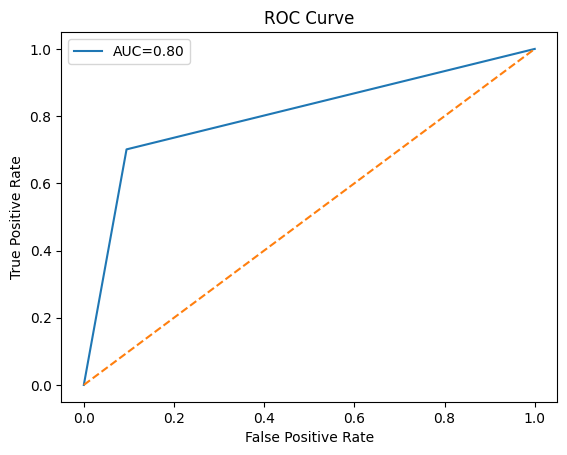

In [53]:
plt.plot(fpr2,tpr2,label=f'AUC={auc2:.2f}')
plt.plot([0,1],[0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()